# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [66]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


##### generation de donnee synthetiques...

In [67]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


#print(np.abs(np.dot(X, beta)).mean())
#print(np.abs(2.0 * np.random.normal(size=n)).mean())

# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


##### regression lineaire avec regularisation Lasso ...


In [68]:
#... regression
from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


#####  representation du resultat


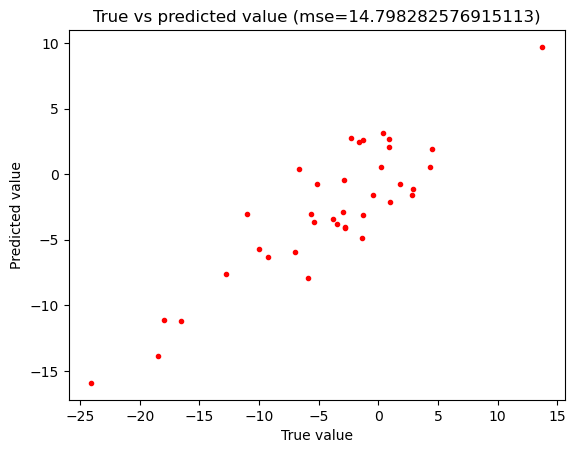

In [69]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



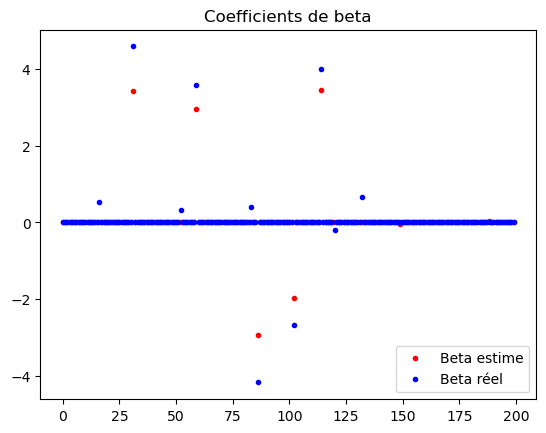

In [81]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta réel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


#### QUESTION 1 :

Jouez l'exemple avec n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

#### Réponse :

- Avec 1000 observations, les résultats sont vraiment bon et les facteurs ayant un impact sont bien identifiés, avec pratiquement aucun faux positif
- Pour 100 et 75 observations, les résultats sont raisonablement bon, et les principaux facteurs sont identifiés, avec cependant quelques faux positifs.
- En dessous de 75 observations, on a du mal a avoir de bonnes predictions et estimer les bons facteurs. 


#### QUESTION 2:
On garde n=75. Utilisez la validation croisee de type K-folds  (typiquement 8-Folds) pour trouver le meilleur coefficient alpha au sens de la MSE.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  


In [94]:

from sklearn.model_selection import KFold

#-> 1ere passe : estimtion de l'echelle du alpha optimal

NB_folds=8

for alpha in [0.001,0.01,0.1,1.,10.]:
  sum_mse_scores=0.
  kf = KFold(n_splits=NB_folds)
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
    

  print(alpha," mean MSE: ",sum_mse_scores/NB_folds)




0.001  mean MSE:  22.669451483667185
0.01  mean MSE:  14.279992374168364
0.1  mean MSE:  11.000983406408256
1.0  mean MSE:  15.327897340073108
10.0  mean MSE:  75.72210367055503


/Users/lrisser/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+00, tolerance: 5.140e-01
  model = cd_fast.enet_coordinate_descent(
/Users/lrisser/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.122e-01, tolerance: 4.899e-01
  model = cd_fast.enet_coordinate_descent(
/Users/lrisser/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Meilleur score obtenu pour alpha=0.1


In [93]:

#-> 2eme passe : estimation plus fine du alpha optimal

for alpha in [0.025,0.05,0.1,0.2,0.4,0.8]:
  sum_mse_scores=0.
  kf = KFold(n_splits=NB_folds)
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso

  print(alpha," mean MSE: ",sum_mse_scores/NB_folds)


0.025  mean MSE:  13.61444543647777
0.05  mean MSE:  12.9045791163272
0.1  mean MSE:  11.000983406408256
0.2  mean MSE:  9.203701952058166
0.4  mean MSE:  9.212862708317786
0.8  mean MSE:  12.327123036946244



Meilleur score obtenu pour alpha=0.2


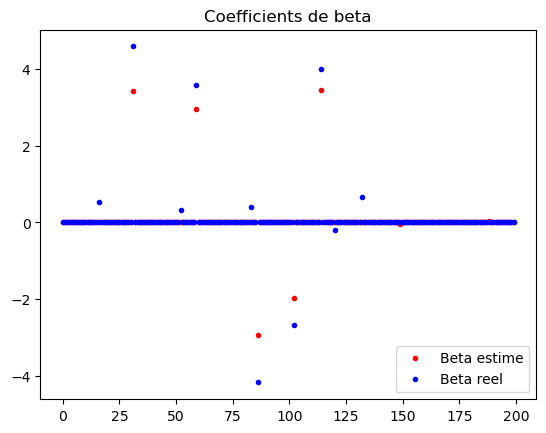

In [78]:
fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()

### Question 3

Utilisation d'une sélection de type *forward* avec un critère de sélection *BIC*


In [79]:

from sklearn.linear_model import LinearRegression


def bic_forward_step(selected_variables,X_train,y_train,X_test,y_test):
    bic_curr = np.inf
    best_variable = -1
    for i in range(p):
        if i not in selected_variables:
            select_var_temp = selected_variables.copy()
            select_var_temp.append(i)
            
            # LR avec cette observation en plus
            lr = LinearRegression()
            lr.fit(X_train[:, select_var_temp], y_train)
            
            # Critère de BIC
            y_p = lr.predict(X_test[:, select_var_temp])
            MSE_M = np.mean(np.power(y_p - y_test,2))
            bic_new = n * np.log(MSE_M) + np.log(n) * (len(select_var_temp) + 1)
            
            if bic_new < bic_curr:
                bic_curr = bic_new
                best_variable = i
    
    # On prend le i qui minimise BIC
    return bic_curr, best_variable


In [97]:

#split training and test data
#X_train=X[:50,:]
#y_train=y[:50]
#X_test=X[50:,:]
#y_test=y[50:]


sum_mse_scores=0.
kf = KFold(n_splits=NB_folds)
for train, test in kf.split(X):
    print('Fold')
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    
    #init
    bic_best = np.inf
    selected_variables = []
    new_bic, new_ind = bic_forward_step(selected_variables,X_train,y_train,X_test,y_test)
    
    #iterative forward selection
    while new_bic < bic_best and len(selected_variables)<p:
        selected_variables.append(new_ind)
        bic_best = new_bic
        new_bic, new_ind = bic_forward_step(selected_variables,X_train,y_train,X_test,y_test)
        
    #linear regression with selected variables
    lr_bic = LinearRegression()
    lr_bic.fit(X_train[:, selected_variables], y_train)
    y_p_bic = lr_bic.predict(X_test[:, selected_variables])
    
    mse_bic = mean_squared_error(y_p_bic, y_test)
    
    sum_mse_scores+=mse_bic



Fold
Fold
Fold
Fold
Fold
Fold
Fold
Fold


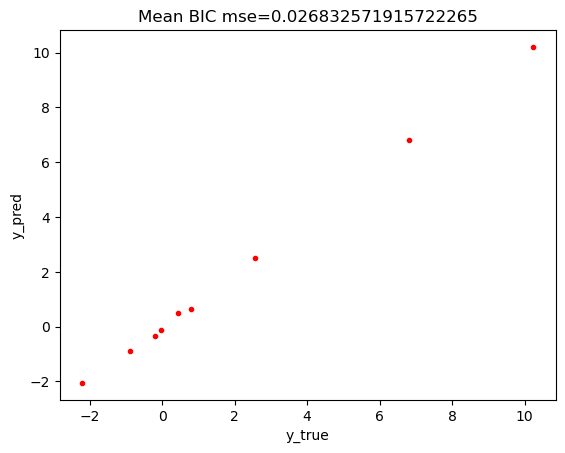

In [99]:
#show the results
plt.figure()
plt.plot(y_test, y_p_bic, 'r.')
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("Mean BIC mse="+str(sum_mse_scores/NB_folds))
plt.show()



In [92]:

print('Variables sélectionnées :',np.sort(selected_variables))

print('Variables utilisées lors de la génération des données :',np.where(beta>0))


Variables sélectionnées : [  2  15  18  22  26  29  31  35  48  53  59  60  65  71  74  76  86 110
 125 136 160 172 198]
Variables utilisées lors de la génération des données : (array([ 16,  31,  52,  59,  83, 114, 132]),)


Les MSE peuvent apparaitre comme très bonnes à 1ere vue. Elles sont cependant à tempérer car à la fois les données train et test ont été utilisées pour l'apprentissage (voir la fonction *bic_forward_step*). On aurait alors besoin d'un autre jeu de validation pour effectuer notre validation croisée de manière correcte.

On peut par se rendre compte que les variables sélectionnées contiennent un nombre non négligeable de faux-positifs (variables sélectionnées n'ayant pas d'impact pour prédire les $y$) et faux-négatifs (variables non sélectionnées ayant un impact pour prédire les $y$). On est alors clairement face à un problème de sur-apprentissage pour lequel les prédictions sont bonnes sur le jeu d'apprentissage, mais ont de grandes chances d'être mal généralisables à d'autres données.